Work on the same dataset as last time.
Download from [here](https://www.kaggle.com/datasets/vishakhdapat/customer-segmentation-clustering).




In [1]:
# Import the dataset
import numpy as np

X = np.genfromtxt('customer_segmentation.csv', delimiter=',')
X = X[~np.isnan(X).all(axis=1),:]
X = X[:,~np.isnan(X).any(axis=0)]

Compute the distance matrix for all samples in the dataset.

Euclidean: (2240, 2240) 2152.288549428259
Manhattan: (2240, 2240) 2656.0
Cosine: (2240, 2240) 0.005633308203276011
Correlation: (2240, 2240) 0.005985806494148482


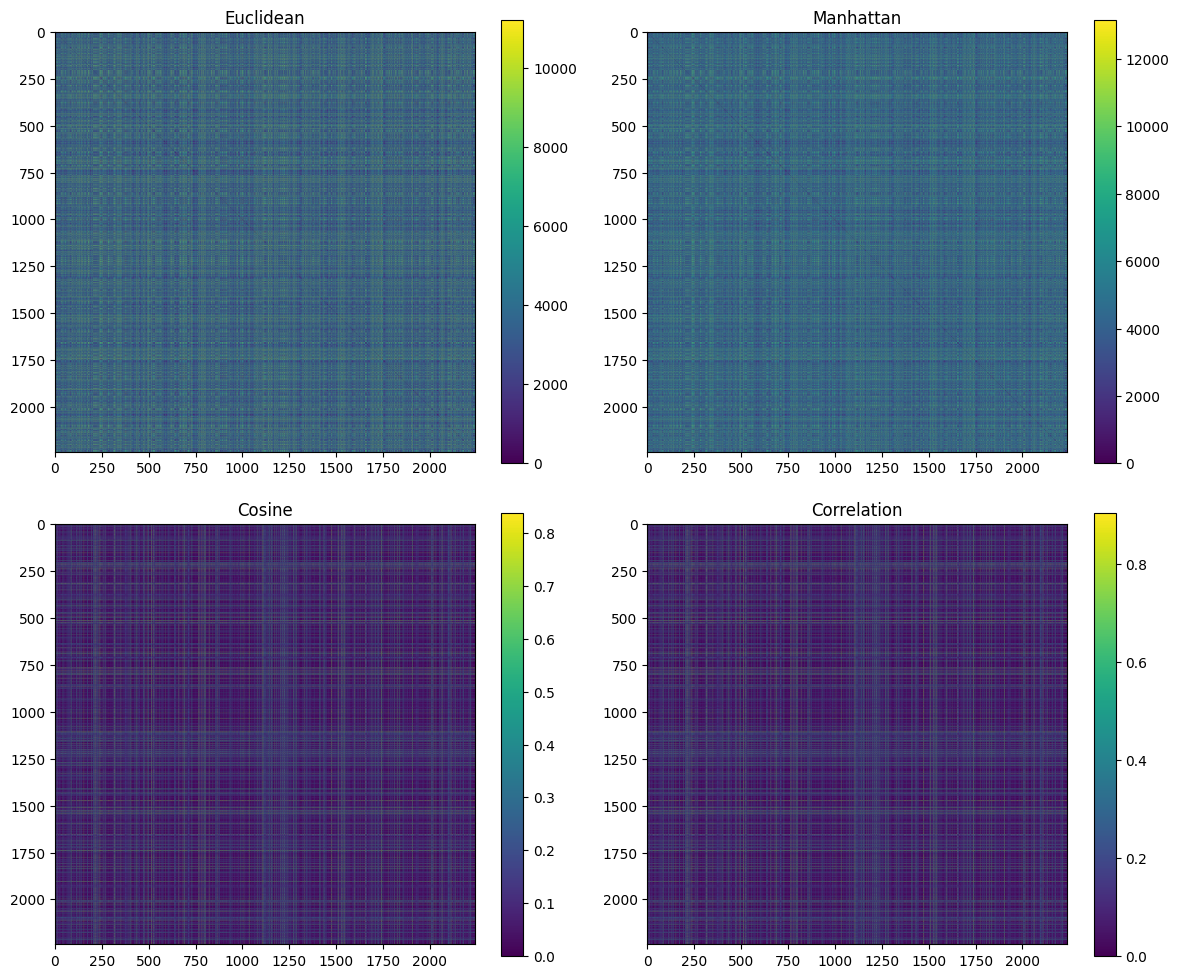

In [5]:
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

# Using Euclidian distance, Manhattan distance, cosine similarity, correlation
dist_matrix_euclid = squareform(pdist(X, metric='euclidean'))
dist_manhattan = squareform(pdist(X, metric='cityblock'))
dist_cosine = squareform(pdist(X, metric='cosine'))
dist_corr = squareform(pdist(X, metric='correlation'))


# Check shape and a value from each distance matrix
print("Euclidean:", dist_matrix_euclid.shape, dist_matrix_euclid[4, 5])
print("Manhattan:", dist_manhattan.shape, dist_manhattan[4, 5])
print("Cosine:", dist_cosine.shape, dist_cosine[4, 5])
print("Correlation:", dist_corr.shape, dist_corr[4, 5])


# Plot the distance matrices
plt.figure(figsize=(12, 10))

# Euclidean
plt.subplot(2, 2, 1)
plt.imshow(dist_matrix_euclid, cmap='viridis')
plt.title('Euclidean')
plt.colorbar()

# Manhattan
plt.subplot(2, 2, 2)
plt.imshow(dist_manhattan, cmap='viridis')
plt.title('Manhattan')
plt.colorbar()

# Cosine
plt.subplot(2, 2, 3)
plt.imshow(dist_cosine, cmap='viridis')
plt.title('Cosine')
plt.colorbar()

# Correlation
plt.subplot(2, 2, 4)
plt.imshow(dist_corr, cmap='viridis')
plt.title('Correlation')
plt.colorbar()

plt.tight_layout()
plt.show()


Perform hierarchical clustering on the dataset.

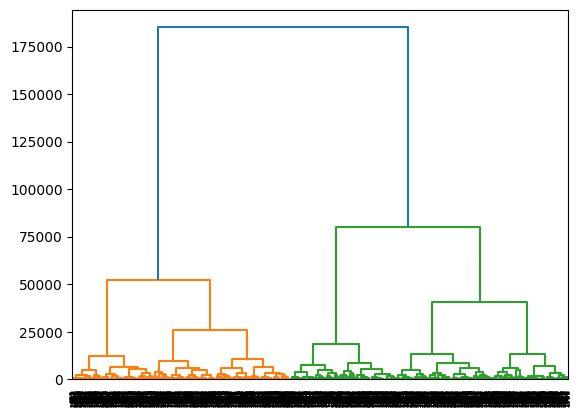

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(pdist(X, metric='euclidean'), method='ward')

# Example for plotting the dendogram using one of the distances matrix
plt.figure()
dendrogram(Z)
plt.show()


Based on the dendogram, choose the optimal number of clusters and apply kmeans.

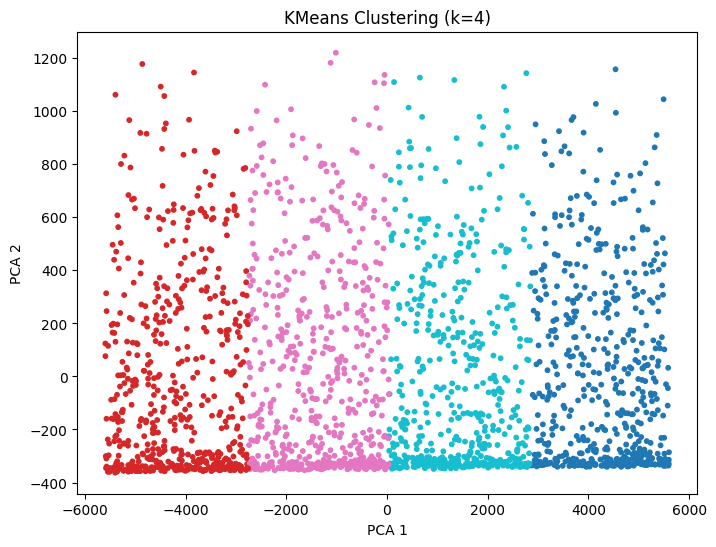

In [8]:
# Apply kmeans and plot the clusters
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# # k=4 from dendrogram
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=10)
plt.title('KMeans Clustering (k=4)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


Use the other three distance metrics to perform clustering and plot the dendograms in 2 by 2 subplots.

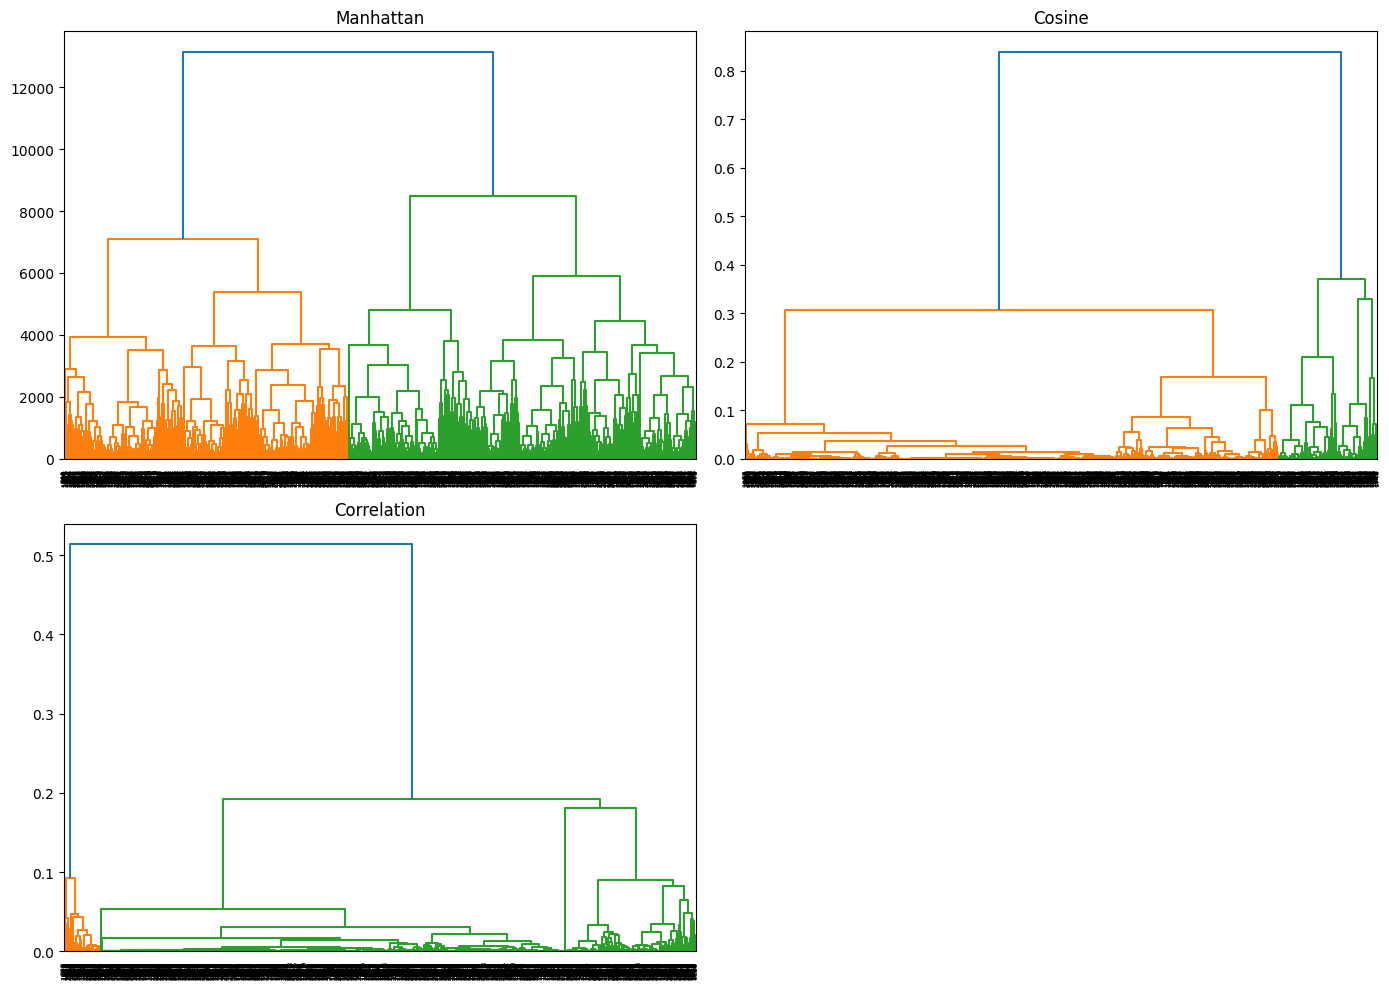

In [11]:
# Linkage matrices for other distances
# 'ward' only works with Euclidean, so used 'complete' and 'average' for others.

Z_manhattan = linkage(pdist(X, metric='cityblock'), method='complete')
Z_cosine = linkage(pdist(X, metric='cosine'), method='complete')
Z_corr = linkage(pdist(X, metric='correlation'), method='average')


# Plot dendrograms in 2x2 subplots
plt.figure(figsize=(14, 10))

# Manhattan
plt.subplot(2, 2, 1)
dendrogram(Z_manhattan)
plt.title('Manhattan')

# Cosine
plt.subplot(2, 2, 2)
dendrogram(Z_cosine)
plt.title('Cosine')

# Correlation
plt.subplot(2, 2, 3)
dendrogram(Z_corr)
plt.title('Correlation')

# Empty subplot
plt.subplot(2, 2, 4)
plt.axis('off')

plt.tight_layout()
plt.show()


Use different linking functions and compare results.
As per scikit learn documentation, the clustering function accepts the following types of linkages:
- 'ward' minimizes the variance of the clusters being merged.
- 'average' uses the average of the distances of each observation of the two sets.
- 'complete' or 'maximum' linkage uses the maximum distances between all observations of the two sets.
- 'single' uses the minimum of the distances between all observations of the two sets.





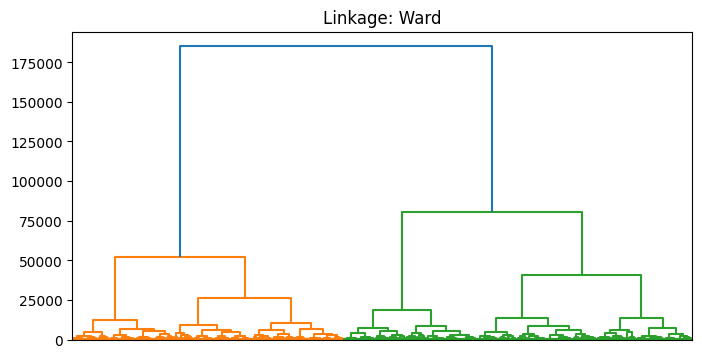

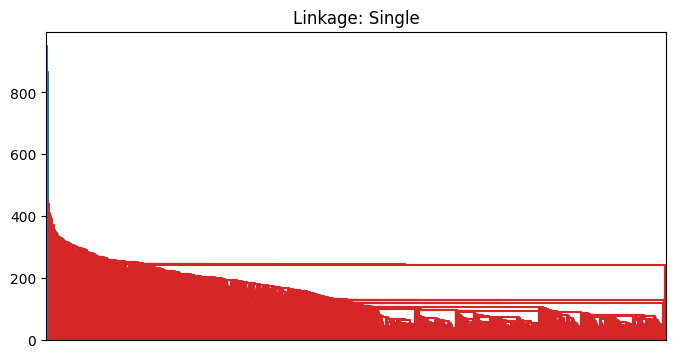

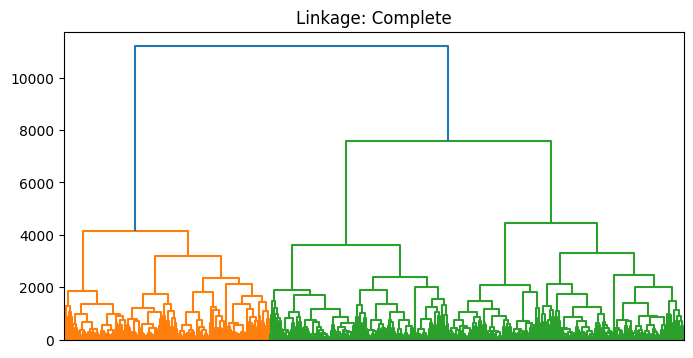

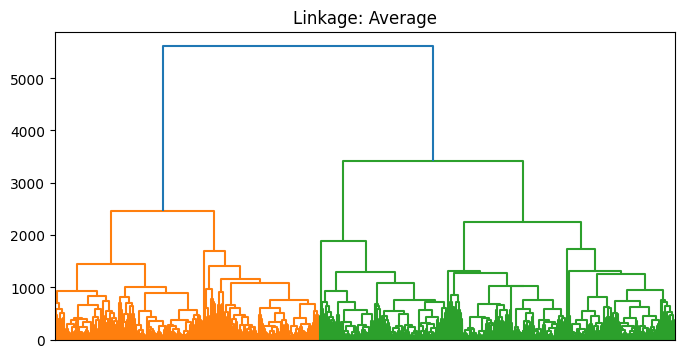

In [12]:
from scipy.spatial.distance import pdist

# Euclidean distance hesapla
dist_euclidean = pdist(X, metric='euclidean')

# Ward
Z_ward = linkage(dist_euclidean, method='ward')
plt.figure(figsize=(8, 4))
dendrogram(Z_ward, no_labels=True)
plt.title('Linkage: Ward')
plt.show()

# Single
Z_single = linkage(dist_euclidean, method='single')
plt.figure(figsize=(8, 4))
dendrogram(Z_single, no_labels=True)
plt.title('Linkage: Single')
plt.show()

# Complete
Z_complete = linkage(dist_euclidean, method='complete')
plt.figure(figsize=(8, 4))
dendrogram(Z_complete, no_labels=True)
plt.title('Linkage: Complete')
plt.show()

# Average
Z_average = linkage(dist_euclidean, method='average')
plt.figure(figsize=(8, 4))
dendrogram(Z_average, no_labels=True)
plt.title('Linkage: Average')
plt.show()



Ward gave the clearest and most balanced clusters. Others were used for comparison.